In [3]:
# Libraries used in this project
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
import random

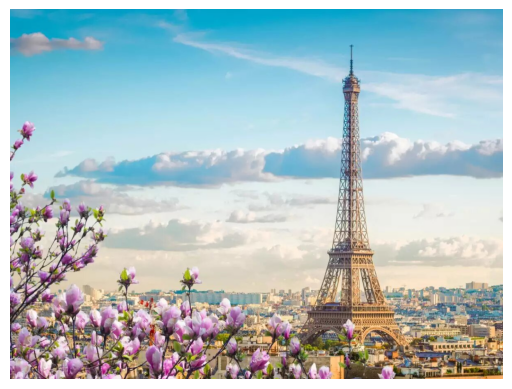

In [4]:
# importing an image
def import_image(filename):
    
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # swap colour channels so that it is displayed correctly

    return img


img = import_image("/Users/ch.bharathchandra/Downloads/eiffel_tower.jpg")
plt.axis('off')
plt.imshow(img)

In [6]:
# APPROXIMATE RUN TIME: 5-10 SECONDS (depending on device)

img = import_image("/Users/ch.bharathchandra/Downloads/eiffel_tower.jpg");

# split up colour channels
r, g, b = cv2.split(img)

# reformat pixel colours into [1 x num_pixels] array
r = r.flatten()[1::50] # take every 50th value from the array
g = g.flatten()[1::50]
b = b.flatten()[1::50]

print(f"{len(r)} total pixels, only {len(r)/50} are shown")

21600 total pixels, only 432.0 are shown


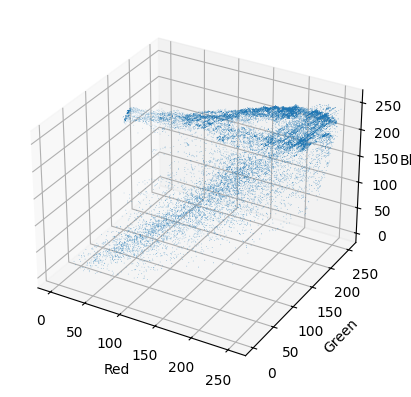

In [8]:
# show on scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r, g, b, s=0.3, linewidths=0)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

plt.savefig("/Users/ch.bharathchandra/Downloads/pixels_in_3d_space.png", format="png", dpi=600)

dimensions: (900, 1200, 3)


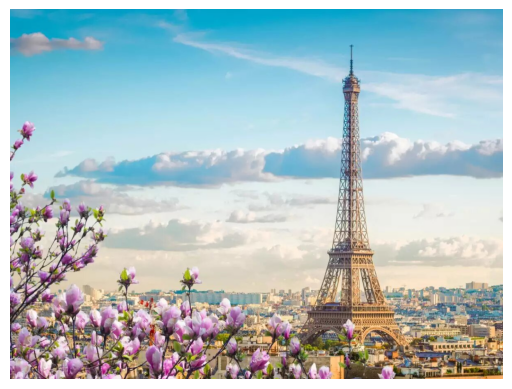

In [9]:
# setup

img = import_image("/Users/ch.bharathchandra/Downloads/eiffel_tower.jpg")
plt.axis('off')
plt.imshow(img)

print(f"dimensions: {img.shape}")

# split into channels
r, g, b = cv2.split(img)

# reformat pixel colours into 1xn array
r = np.array(r.flatten())
g = np.array(g.flatten())
b = np.array(b.flatten())

In [38]:
# ESTIMATED RUN TIME - depends on size of image - if using images supplied with this notebook, around 30-45 seconds depending 
# on value of k chosen. Higher values take longer to run.

img = import_image("/Users/ch.bharathchandra/Downloads/eiffel_tower.jpg")

# split image into channels, reformat h x w x c structure 
img = np.array(cv2.split(img))
img = img.transpose(1, 2, 0)

# exit conditions
max_iter = 10
moved = True

# number of clusters
k = 15

# initial cluster centres
clusters = [[random.randint(0, 255) for i in range(3)] for j in range(k) ]


In [39]:
# define distance function
def euclidean_distance(a, b):
    return (np.sqrt(np.sum( (b-a)**2, 2)))

In [40]:
# main

iter = 0
while iter <= max_iter and moved == True:
    iter += 1

    # calculate distance between pixels and cluster, for every cluster
    distances = [euclidean_distance(img, clusters[i]) for i in range(k)]        

    # index (0, ..., k) of the nearest cluster centre for each pixel
    # produces an array the same shape as the image, instead of pixels,
    # it stores in the index of the nearest cluster
    # this can be used as a mask later on
    nearest = np.argmin(distances, 0) 

    prev_clusters = clusters.copy()
    
    for i in range(k):
        
        # create 1-hot encoded mask of which pixels belong to the cluster
        ind = np.array( np.where(nearest == i, 1, 0), dtype = bool) 

        # apply mask to image to extract subset of pixels 
        subset = img[ind] 

         # calculate mean of the identified subset - update cluster centres
        clusters[i] = [np.round(np.mean(subset[:,0])), np.round(np.mean(subset[:,1])), np.round(np.mean(subset[:,2]))]

        # remove NaN values - replace with 0
        if np.isnan(clusters[i][0]):
            clusters[i][0] = 0
        if np.isnan(clusters[i][1]):
            clusters[i][1] = 0
        if np.isnan(clusters[i][2]):
            clusters[i][2] = 0

    if clusters == prev_clusters:
        moved = False
    

# after the final iteration, the cluster centres represent the pixel colour of each cluster
# we apply the final version of the array, nearest, as a mask to sample colours for each pixel

clusters = np.array(clusters, dtype = int)
img2 = clusters[nearest]

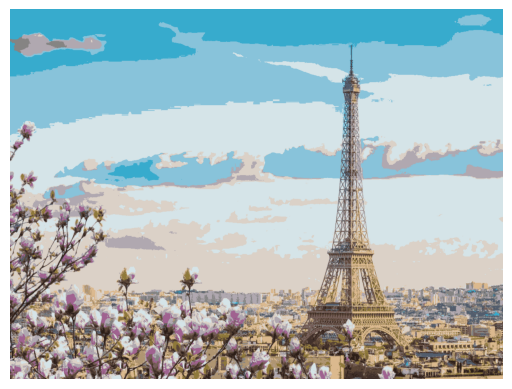

In [41]:

# display image
plt.axis('off')
plt.imshow(img2)

plt.savefig("/Users/ch.bharathchandra/Downloads/eifffel.png", format="png", dpi=600)